# 텐서플로우 1.x

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np


In [ ]:
tf.__version__

'1.15.2'

In [ ]:
X = np.array([
              [0,0],
              [0,1],
              [1,0],
              [1,1]
        ], dtype="float32")

y = np.array([
              [0],
              [0],
              [0],
              [1]
        ], dtype="float32")

In [ ]:
w = tf.Variable([[1],[2]], dtype="float32")
w
b = tf.Variable([3], dtype="float32")
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>

## 곱의 계산

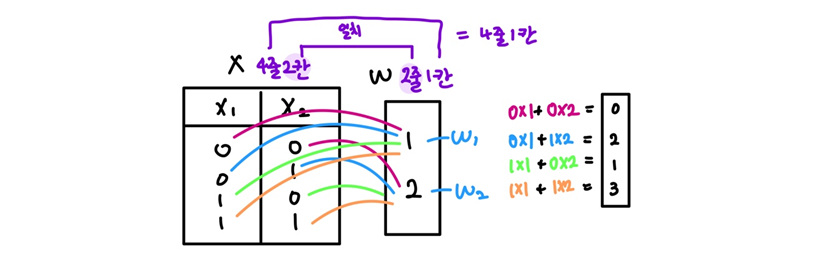

In [ ]:
# 활성화 함수
tf.sigmoid( tf.matmul(X , w) + b )

# learning_rate
optimizer = tf.train.AdamOptimizer(0.1)
optimizer

In [ ]:
for step in range(1000):
    with tf.GradientTape() as tape: # 기울기 계산
      print("step =", step)
      
      # 예측값
      hypothesis = tf.sigmoid(tf.matmul(X,w)+b)
      print("hypothesis = ", hypothesis)

      # 오차
      cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
      print("cost = ",cost)

      # 기울기
      grads = tape.gradient(cost, [w,b])
      print("기울기", grads)

      # 업데이트
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w , b]))

      print("w =",w)
      print("b =",b)
      print("="*100)

In [ ]:
# 예측

tf.matmul(X,w)+b
tf.sigmoid(tf.matmul(X,w)+b)
predict = tf.sigmoid(tf.matmul(X,w)+b)
predict

predict1 = tf.cast(predict > 0.5, dtype="float32")
predict1


<tf.Tensor: id=262975, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
# 진짜값과 예측값 비교
ac01 = tf.equal(predict1,y)
ac01

<tf.Tensor: id=262977, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
# 정확도계산
ac02 = tf.cast(ac01, dtype="float32")
ac02

accurary = tf.reduce_mean(tf.cast(tf.equal(predict1, y), dtype="float32"))
print("accurary =", accurary.numpy())

# 텐서플로우 2.x

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
X = np.array([
              [0,0],
              [0,1],
              [1,0],
              [1,1]
        ], dtype="float32")

# 2.x 버전은 이렇게 써도 알아서 해석함
# y = np.array([0,0,0,1], dtype="int32")

y = np.array([
              [0],
              [0],
              [0],
              [1]
        ], dtype="float32")

In [ ]:
# 예측을 할 객체
model = Sequential()

# 주로 분류에 쓰이는 함수 = sigmoid
model.add(Dense(1, input_dim=2, activation="sigmoid"))

# dense : 선형회귀 할거다
# Output_Shape 계산 결과의 (줄,칸)
# param : w,b의 개수
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# cost
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.1), metrics=["acc"])

In [ ]:
# 예측, 기울기 알아서 해줌 fit
model.fit(X,y, epochs=100)

Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 66ms/sample - loss: 0.7524 - acc: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.7028 - acc: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.6636 - acc: 0.7500
Epoch 4/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.6347 - acc: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.6138 - acc: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.5976 - acc: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.5837 - acc: 0.7500
Epoch 8/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.5707 - acc: 0.7500
Epoch 9/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.5577 - acc: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 3ms/sample - loss: 0.5443 - acc: 0.7500
Epoch 11/100
4/4 [=====================

In [ ]:
# w1,w2,b 
model.layers[0].get_weights()

[array([[3.6781373],
        [3.6676438]], dtype=float32), array([-5.6066017], dtype=float32)]

In [ ]:
# 예측
pred = model.predict(X)
pred

predict1 = np.where(pred >0.5, 1, 0)
print("predict1 = ")
print(predict1)

predict1 = 
[[0]
 [0]
 [0]
 [1]]


# 실습

## 인공신경망을 이용한 AND연산
- tensorflow 1.x
- 107 ~ 120

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
def print_a(title, real):
  print("{} : {}\n{}".format(title,"="*50,real))

In [ ]:
# 4줄에 2칸
X = np.array([
          [0,0],
          [0,1],
          [1,0],
          [1,1]
], dtype = "float32")

# 4줄에 1칸
y = np.array([
              [0],
              [0],
              [0],
              [1]
], dtype="float32")

# 2줄 1칸
w = tf.Variable([
                 [1], 
                 [2]
                 ], dtype = "float32")
# 1줄 1칸
b = tf.Variable([3],  dtype = "float32")

print_a("X",X)
print_a("y",y)
print_a("w",w)
print_a("b",b)

X : ==================================================
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y : ==================================================
[[0.]
 [0.]
 [0.]
 [1.]]
w : ==================================================
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>
b : ==================================================
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>


행렬 연산

In [ ]:
print("X*w+b =\n", tf.matmul(X,w)+b)
print("="*100)
print("sigmoid =\n", tf.sigmoid(tf.matmul(X,w)+b))
print("="*100)

# 예측값 변수 저장
hypothesis = tf.sigmoid(tf.matmul(X,w)+b)
print("예측값 = ",hypothesis)

X*w+b =
 tf.Tensor(
[[3.]
 [5.]
 [4.]
 [6.]], shape=(4, 1), dtype=float32)
sigmoid =
 tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
예측값 =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)


In [ ]:
# learning_rate = 0.1
optimizer = tf.train.AdamOptimizer(0.1)

for step in range(1000):
  with tf.GradientTape() as tape:
    print("step = ", step)

    # 예측값
    hypothesis = tf.sigmoid(tf.matmul(X,w)+b)

    # 오차
    cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
    print("cost = ",cost)

    # 기울기
    grads = tape.gradient(cost, [w,b])
    print("기울기 =", grads)

    # 업데이트
    optimizer.apply_gradients(grads_and_vars = zip(grads, [w , b]))
    print("="*50)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       [-0.01050301]], dtype=float32)>, <tf.Tensor: id=275797, shape=(1,), dtype=float32, numpy=array([0.04598527], dtype=float32)>]
step =  167
cost =  tf.Tensor(0.1901629, shape=(), dtype=float32)
기울기 = [<tf.Tensor: id=275861, shape=(2, 1), dtype=float32, numpy=
array([[-0.01076582],
       [-0.01044564]], dtype=float32)>, <tf.Tensor: id=275860, shape=(1,), dtype=float32, numpy=array([0.04566409], dtype=float32)>]
step =  168
cost =  tf.Tensor(0.18893762, shape=(), dtype=float32)
기울기 = [<tf.Tensor: id=275924, shape=(2, 1), dtype=float32, numpy=
array([[-0.01070451],
       [-0.01038802]], dtype=float32)>, <tf.Tensor: id=275923, shape=(1,), dtype=float32, numpy=array([0.04534803], dtype=float32)>]
step =  169
cost =  tf.Tensor(0.1877251, shape=(), dtype=float32)
기울기 = [<tf.Tensor: id=275987, shape=(2, 1), dtype=float32, numpy=
array([[-0.01064273],
       [-0.01032989]], dtype=float32)>, <tf.Tensor: id=275986, shape=(1,), dtype=float32, numpy=array(

In [ ]:
print("w =\n", w)
print("="*100)
print("b =\n", b)

w =
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[7.6974106],
       [7.702255 ]], dtype=float32)>
b =
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-11.636597], dtype=float32)>


In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-11.636597], dtype=float32)>